In [74]:
import numpy as np
import math
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt 
import re
import os

In [75]:
model = "small"

In [76]:
total_error_double = np.loadtxt(("%s/%s_dp/%s_dp_E.dat" % (os.getcwd(),model, model)),usecols= 1)
total_error_single = np.loadtxt(("%s/%s_sp/%s_sp_E.dat" % (os.getcwd(),model, model)),usecols= 1)
total_error_mixed = np.loadtxt(("%s/%s_mp/%s_mp_E.dat" % (os.getcwd(),model, model)),usecols= 1)

sun = np.loadtxt(("%s/%s_dp/%s_dp_E.dat" % (os.getcwd(),model, model)),usecols= 2)

t2_error_double = np.loadtxt(("%s/%s_dp/%s_dp_E.dat" % (os.getcwd(),model,model)),usecols=0)
t2_error_single = np.loadtxt(("%s/%s_sp/%s_sp_E.dat" % (os.getcwd(),model,model)),usecols=0)
t2_error_mixed = np.loadtxt(("%s/%s_mp/%s_mp_E.dat" % (os.getcwd(),model,model)),usecols=0)


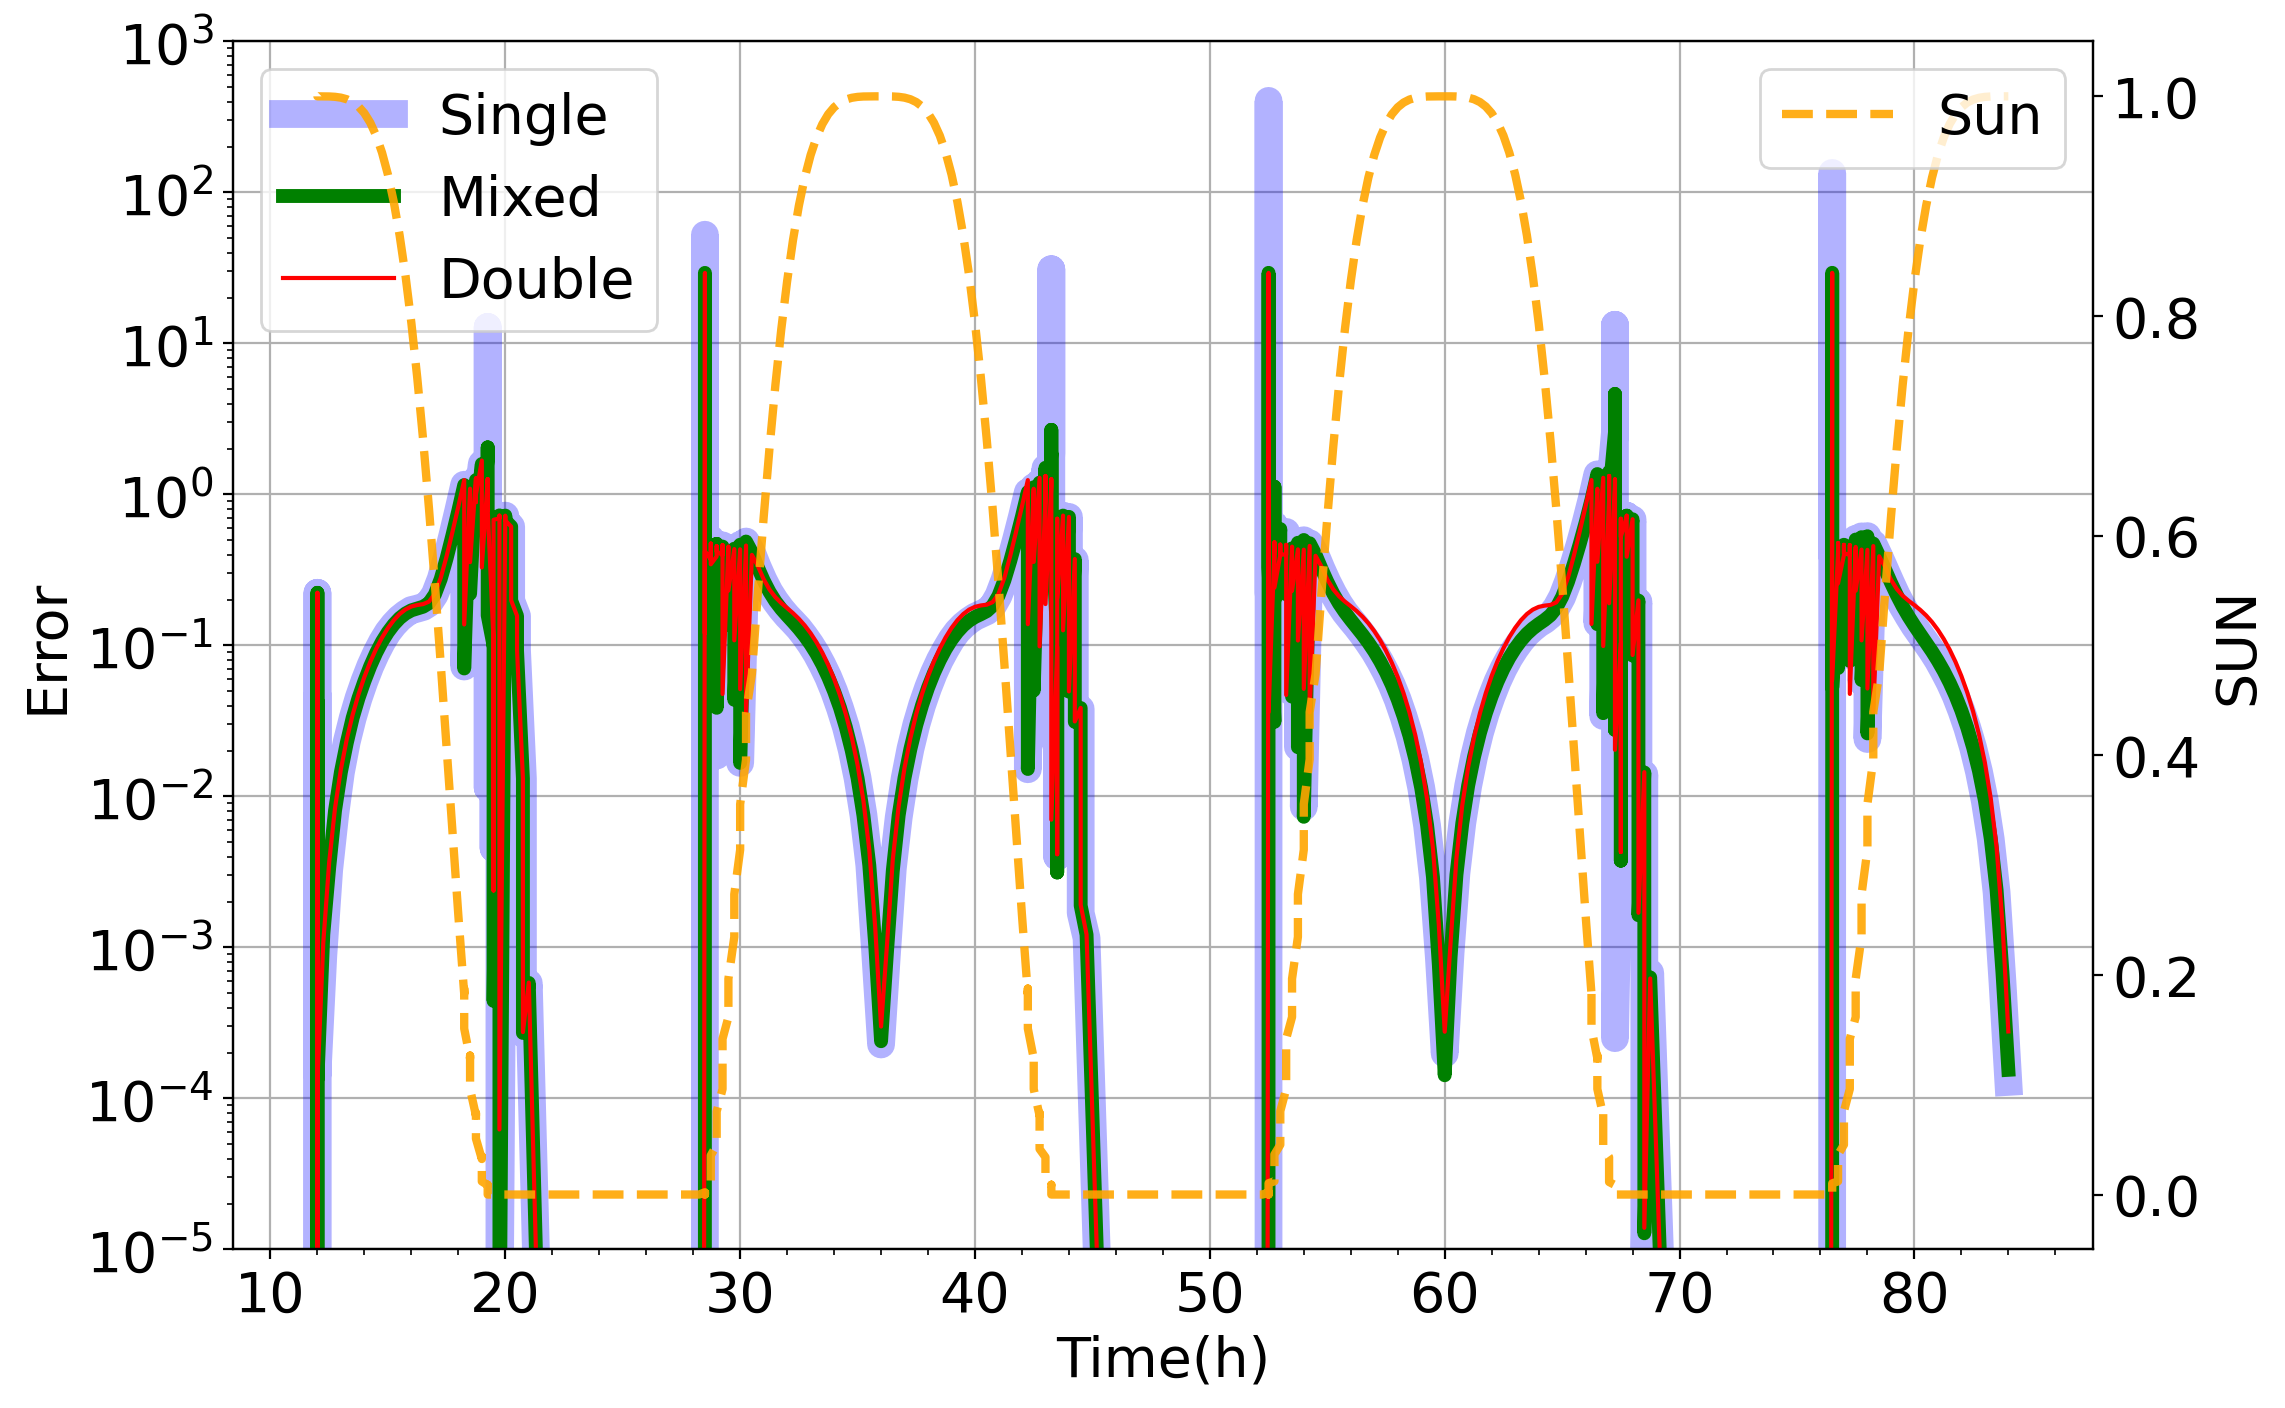

In [78]:
fig, ax = plt.subplots(figsize=(12,8), dpi=200)
 
ax2 = ax.twinx()
ax.grid(True, which="major")
ax.semilogy(t2_error_single,total_error_single, label = "Single", color = 'blue',alpha=0.3,linewidth=10)
ax.semilogy(t2_error_mixed,total_error_mixed, label = "Mixed", color = 'green',alpha=1,linewidth=5)
ax.semilogy(t2_error_double,total_error_double, label = "Double", color = 'red',alpha=1,linewidth=1.5)



ax.set_ylim([1e-5,1000])

ax2.plot(t2_error_double, sun, label = "Sun", color = 'orange', linestyle = '--', alpha=0.9,linewidth=3)
ax2.set_ylim([-0.05,1.05])

ax.set_xlabel('Time(h)', fontsize=20)
ax.set_ylabel('Error', fontsize=20)
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax.minorticks_on()

ax2.set_ylabel('SUN', fontsize=20)
ax.legend(loc ="upper left", fontsize=20)
ax2.legend(loc = "upper right", fontsize=20)
# plt.show()
plt.savefig("/home/kyriacos/CyprusInstitute/figure1.pdf", facecolor='white')


In [68]:
model = "cbm4"
species = 32

In [69]:
concentrations_ref = np.loadtxt(("%s/%s_ref/%s_ref.dat" % (os.getcwd(),model, model)),usecols=range(1,species+1))
concentrations_double = np.loadtxt(("%s/%s_dp/%s_dp.dat" % (os.getcwd(),model, model)),usecols=range(1,species+1))
concentrations_single = np.loadtxt(("%s/%s_sp/%s_sp.dat" % (os.getcwd(),model, model)),usecols=range(1,species+1))
concentrations_mixed = np.loadtxt(("%s/%s_mp/%s_mp.dat" % (os.getcwd(),model, model)),usecols=range(1,species+1))
t_ref = np.loadtxt(("%s/%s_ref/%s_ref.dat" % (os.getcwd(),model,model)),usecols=0)

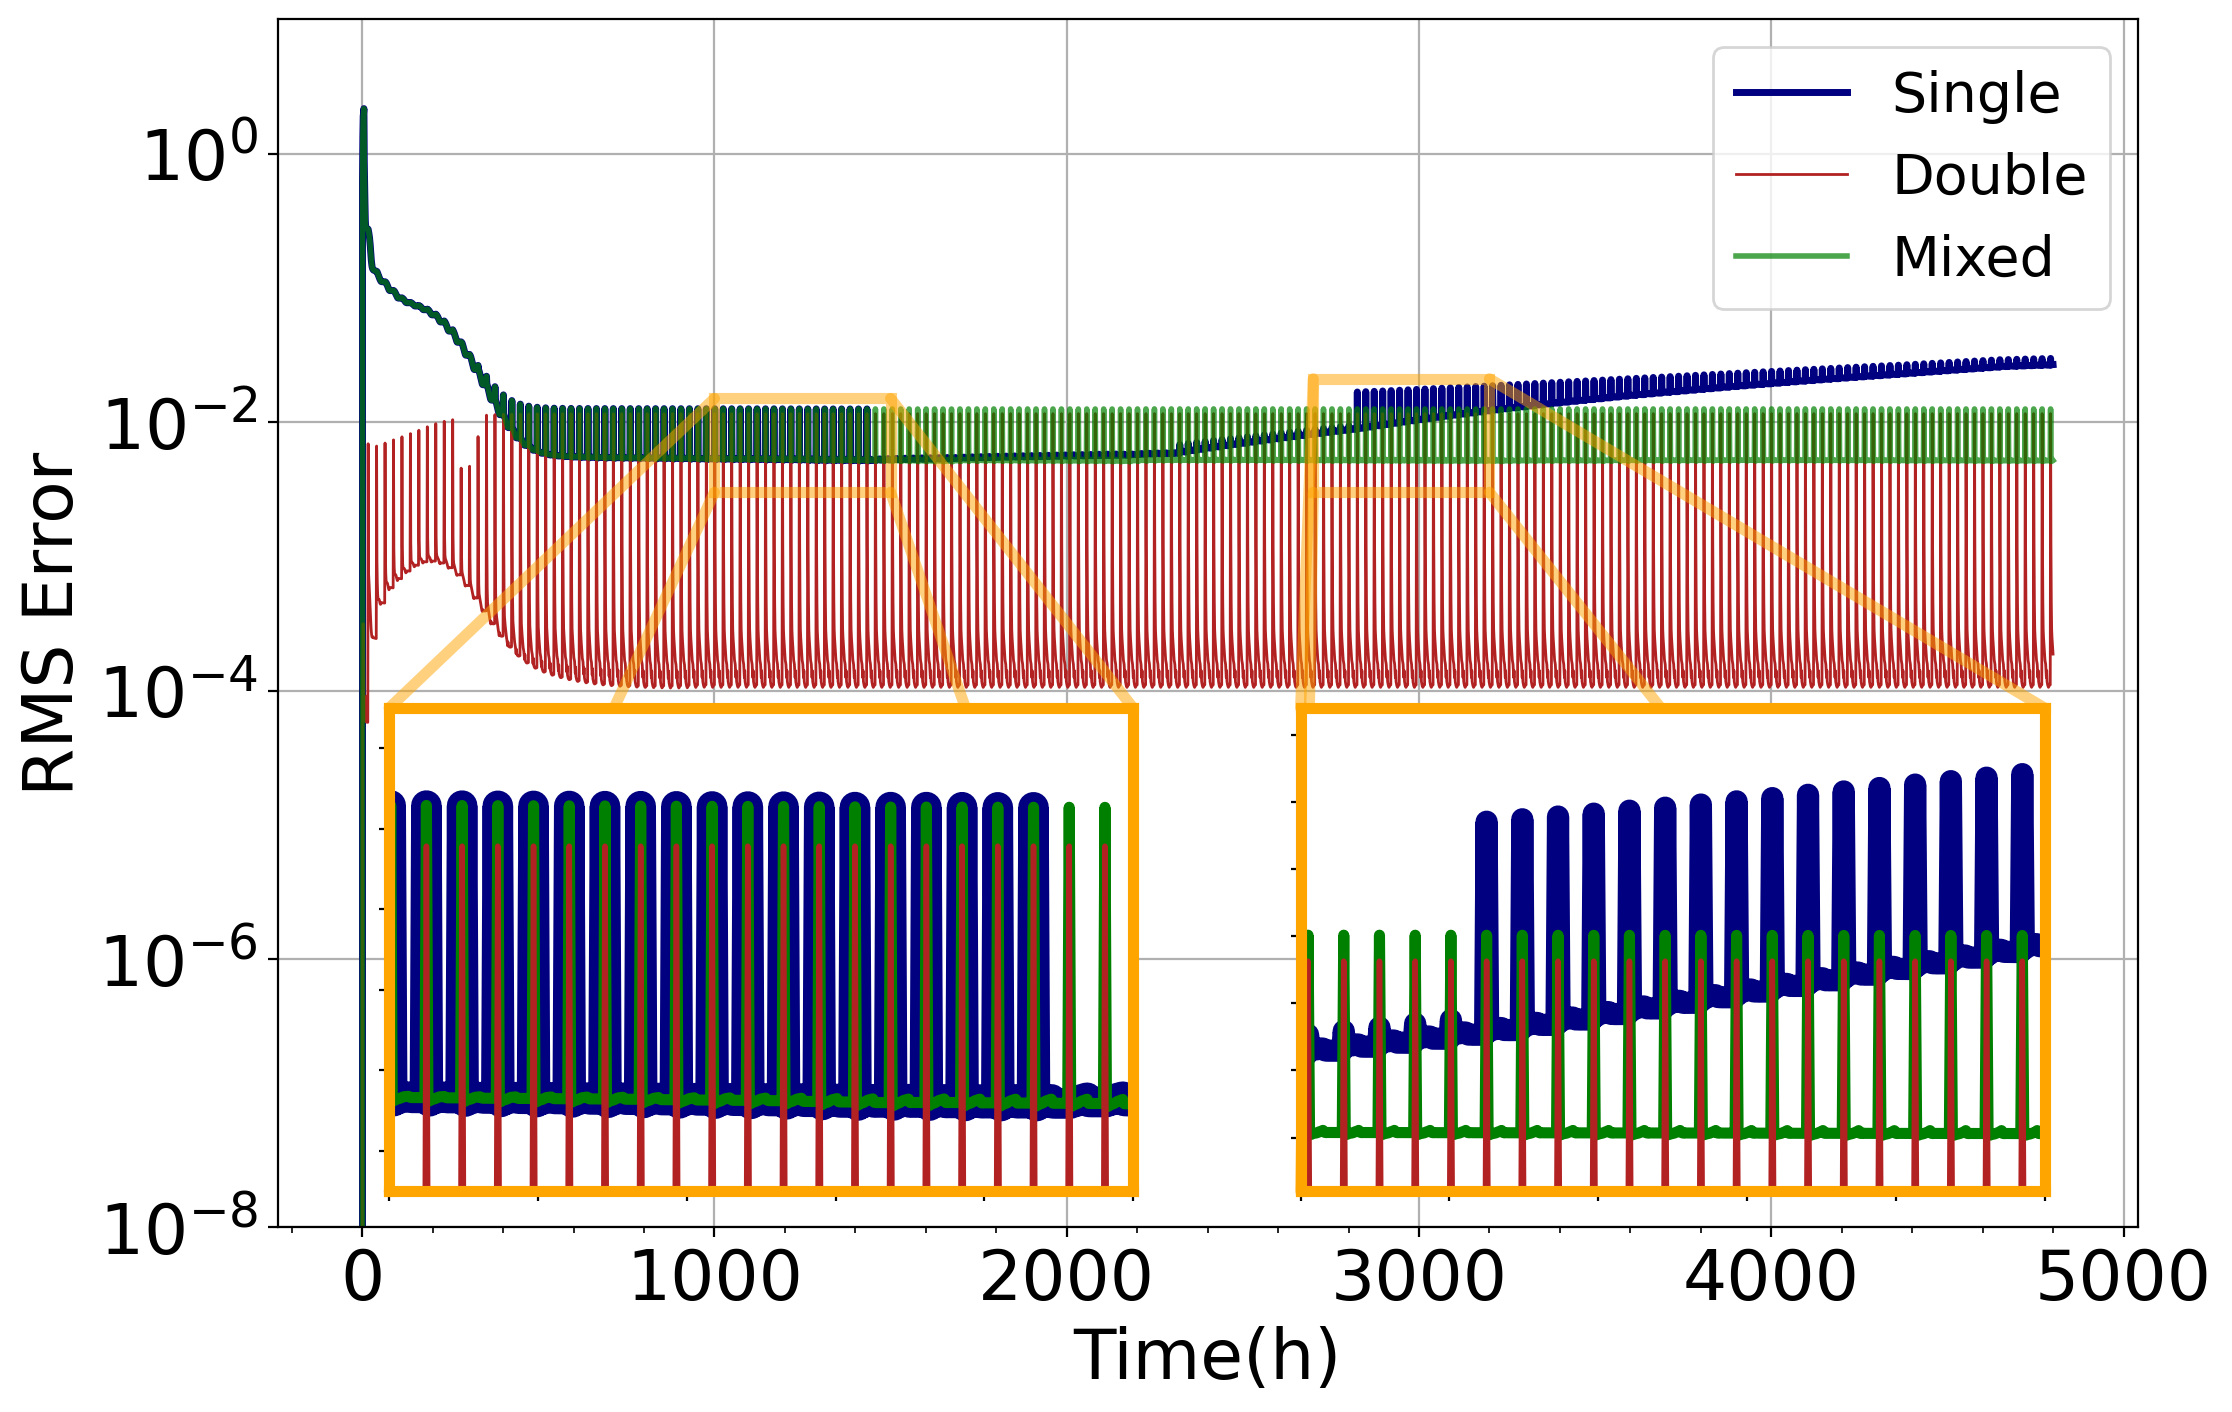

In [70]:
rms_single = np.zeros(len(concentrations_single))
rms_double = np.zeros(len(concentrations_double))
rms_mixed = np.zeros(len(concentrations_mixed))

for i in range(len(concentrations_single)):
    sum1_single = 0.0
    sum2_single = 0.0

    for d in range (species):
        if concentrations_ref[i][d] > 1e-38:
            sum1_single = sum1_single + (((concentrations_single[i][d]-concentrations_ref[i][d])/concentrations_ref[i][d])**2*concentrations_ref[i][d])
            sum2_single = sum2_single + concentrations_ref[i][d]
            
    rms_single[i] = math.sqrt(sum1_single/sum2_single)
    
for i in range(len(concentrations_double)):        
    sum1_double = 0.0
    sum2_double = 0.0
    for d in range (species):
        if concentrations_ref[i][d] > 1e-38:
            sum1_double = sum1_double + (((concentrations_double[i][d]-concentrations_ref[i][d])/concentrations_ref[i][d])**2*concentrations_ref[i][d])
            sum2_double = sum2_double + concentrations_ref[i][d]
    
    rms_double[i] = math.sqrt(sum1_double/sum2_double)
    
            
for i in range(len(concentrations_mixed)):
    sum1_mixed = 0.0
    sum2_mixed = 0.0
    for d in range (species):
        if concentrations_ref[i][d] > 1e-38:
            sum1_mixed = sum1_mixed + (((concentrations_mixed[i][d]-concentrations_ref[i][d])/concentrations_ref[i][d])**2*concentrations_ref[i][d])
            sum2_mixed = sum2_mixed + concentrations_ref[i][d]
    
    rms_mixed[i] = math.sqrt(sum1_mixed/sum2_mixed)
    
    
fig, ax=plt.subplots()
fig.set_size_inches(12, 8)
fig.set_dpi(200)
ax.plot(t_ref,rms_single, label='Single', color = 'navy',alpha=1,linewidth=2.5)
ax.plot(t_ref,rms_double, label='Double', color = 'firebrick',alpha=1,linewidth=1)
ax.plot(t_ref,rms_mixed, label='Mixed', color = 'green',alpha=0.7,linewidth=2)
axins=ax.inset_axes([0.06 , 0.03, .4, .4])
axins.plot(t_ref,rms_single, label='Single', color = 'navy',alpha=1,linewidth=11)
axins.plot(t_ref,rms_mixed, label='Mixed', color = 'green',alpha=1,linewidth=4)
axins.plot(t_ref,rms_double, label='Double', color = 'firebrick',alpha=1,linewidth=2)

axins.set_xlim(1000,1500)
axins.set_ylim(3e-3,1.5e-2)
# axins.set_yscale('log')
axins.set_xticklabels([])
axins.set_yticklabels([])


rectpatch, connects=ax.indicate_inset_zoom(axins,edgecolor='orange',lw=4)
connects[0].set_visible(True)
connects[0].set_linewidth(4)

connects[1].set_visible(True)
connects[1].set_linewidth(4)

connects[2].set_visible(True)
connects[2].set_linewidth(4)

connects[3].set_visible(True)
connects[3].set_linewidth(4)

axins2=ax.inset_axes([0.55 , 0.03, .4, .4])
axins2.plot(t_ref,rms_single, label='Single', color = 'navy',alpha=1,linewidth=8)
axins2.plot(t_ref,rms_mixed, label='Mixed', color = 'green',alpha=1,linewidth=4)
axins2.plot(t_ref,rms_double, label='Double', color = 'firebrick',alpha=1,linewidth=2)

axins2.set_xlim(2700,3200)
axins2.set_ylim(3e-3,2.1e-2)
# axins.set_yscale('log')
axins2.set_xticklabels([])
axins2.set_yticklabels([])


rectpatch2, connects2=ax.indicate_inset_zoom(axins2,edgecolor='orange',lw=4)
connects2[0].set_visible(True)
connects2[0].set_linewidth(4)

connects2[1].set_visible(True)
connects2[1].set_linewidth(4)

connects2[2].set_visible(True)
connects2[2].set_linewidth(4)

connects2[3].set_visible(True)
connects2[3].set_linewidth(4)



ax.set_xlabel('Time(h)', fontsize=25)
ax.set_ylabel('RMS Error', fontsize=25)
ax.set_yscale('log')
ax.tick_params(axis='y', labelsize=25)
ax.tick_params(axis='x', labelsize=25)

axins.spines['bottom'].set_color('orange')
axins.spines['bottom'].set_linewidth(4)

axins.spines['top'].set_color('orange')
axins.spines['top'].set_linewidth(4)

axins.spines['left'].set_color('orange')
axins.spines['left'].set_linewidth(4)

axins.spines['right'].set_color('orange')
axins.spines['right'].set_linewidth(4)

axins2.spines['bottom'].set_color('orange')
axins2.spines['bottom'].set_linewidth(4)

axins2.spines['top'].set_color('orange')
axins2.spines['top'].set_linewidth(4)

axins2.spines['left'].set_color('orange')
axins2.spines['left'].set_linewidth(4)

axins2.spines['right'].set_color('orange')
axins2.spines['right'].set_linewidth(4)




ax.legend(loc ="upper right", fontsize=20)
ax.grid()
ax.set_ylim([1e-8,1e+1])
ax.minorticks_on()
plt.savefig("/home/kyriacos/CyprusInstitute/figure2.pdf", facecolor='white')


In [71]:
model = "strato"
species_names = ("CH3","Cl2","Cl2O2","ClOO","OClO","BrCl","HOBr","BrONO2","HCO","CH3O","O1D","N2O5","HBr","CH3OOH","HNO4","HCl","H2O2","HOCl","HNO3","H","CH3O2","ClONO2","NO3","CH2O","Br","OH","Cl","ClO","O3","NO","BrO","O","HO2","NO2")
species = len(species_names)

In [72]:
concentrations_double = np.loadtxt(("%s/%s_dp/%s_dp.dat" % (os.getcwd(),model, model)),usecols=range(1,species+1))
concentrations_mixed = np.loadtxt(("%s/%s_mp/%s_mp.dat" % (os.getcwd(),model, model)),usecols=range(1,species+1))

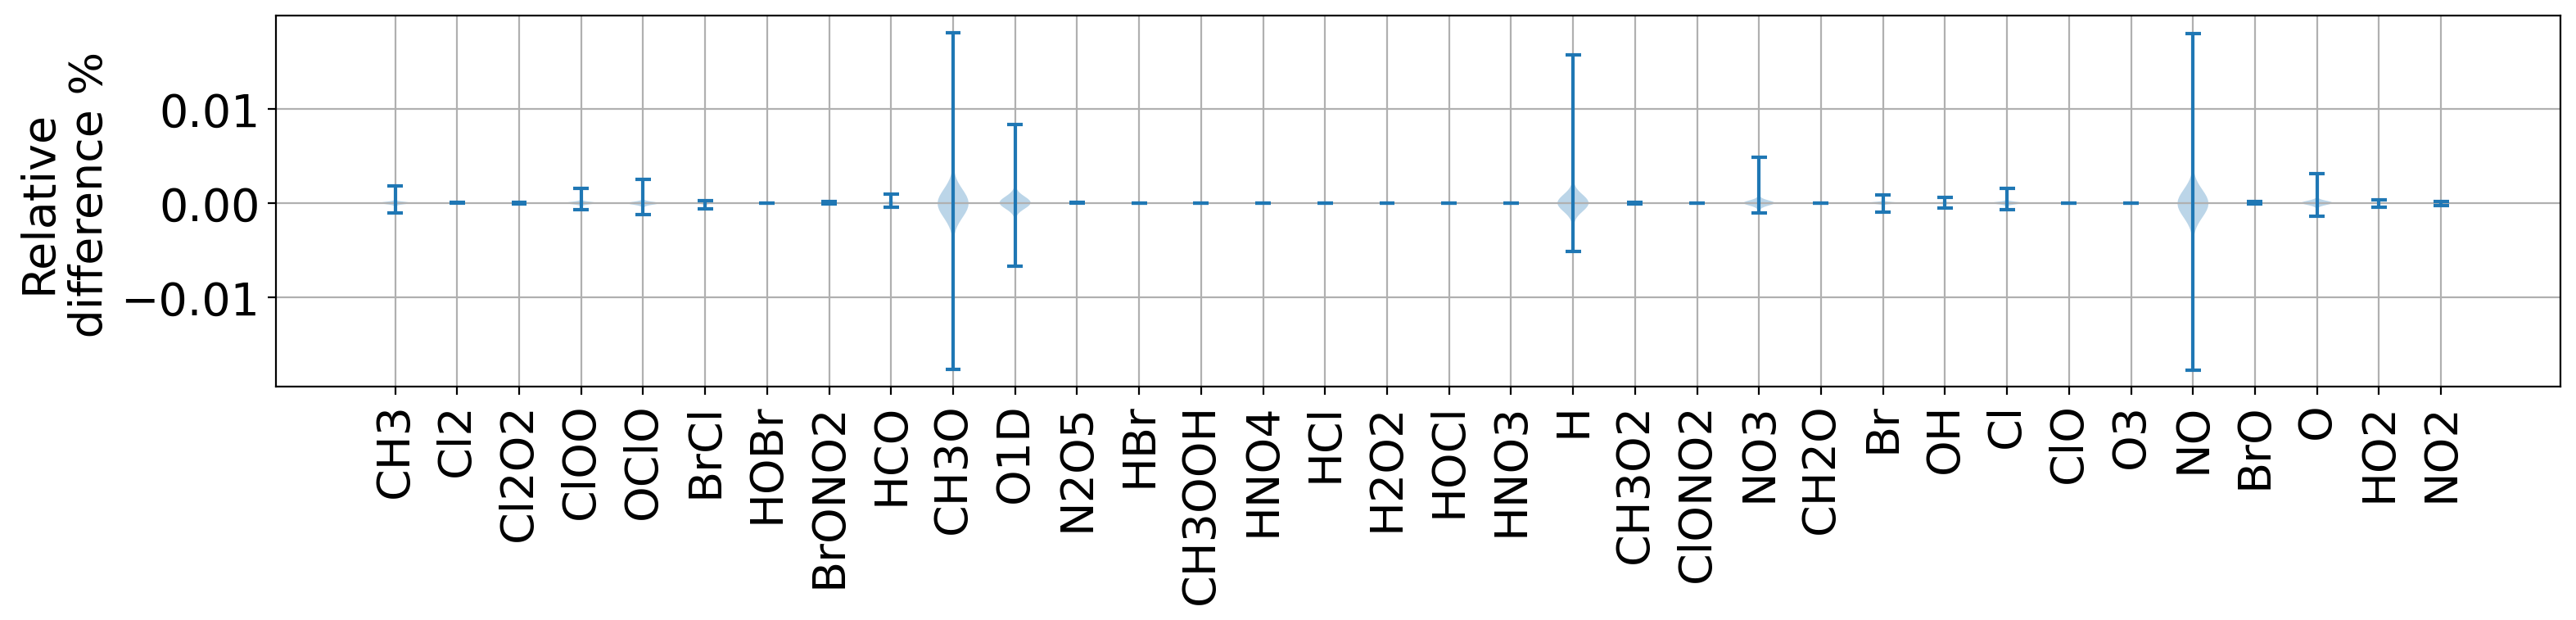

In [73]:
#violin plot

reldiff = np.zeros([len(concentrations_mixed), species])
for j in range(species):
    for i in range(len(concentrations_mixed)):
        if concentrations_mixed[i][j] <= 0:
            reldiff[i][j] = 0.0
        else:
            reldiff[i][j] = (concentrations_double[i][j]-concentrations_mixed[i][j])/(concentrations_double[i][j]+concentrations_mixed[i][j])

coll = np.zeros(species,dtype=object)
coll2 = np.zeros(species,dtype=object)
coll3 = np.zeros(1,dtype=object)
species_names2 = np.zeros(species-1,dtype=object)
species_names3 = np.zeros(1,dtype=object)

for j in range(species):
    coll[j] = reldiff[:,j]


plt.figure(figsize=(18,3), dpi=200)
ax = plt.subplot(111)
plt.violinplot(coll)
ax.set_xticks(range(1,species+1))
ax.set_xticklabels(species_names,rotation = 90,fontsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.locator_params(axis='y', nbins=4)


ax.grid(True, which="major")
plt.ylabel('Relative\n difference %', fontsize=20)
plt.savefig("/home/kyriacos/CyprusInstitute/figure3.pdf", facecolor='white')
